In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from pycaret.regression import *
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import BayesianRidge, OrthogonalMatchingPursuit
from catboost import CatBoostRegressor
import pickle
%matplotlib inline

In [2]:
#!pip install catboost

In [3]:
df = pd.read_csv("data//data_for_preprocessing.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SalePrice,House_Age,Years_Since_Modified,Garage_Age,TotalBaths,LivingArea,PorchDeckSF
0,1,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,1,6,706,1,0,150,856,GasA,5,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,5,0,0,Attchd,2,548,3,3,Y,0,61,0,0,0,0,0,NoFence,None,0,208500,5,5,5.0,2.5,2566,61
1,2,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,4,5,978,1,0,284,1262,GasA,5,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,5,1,3,Attchd,2,460,3,3,Y,298,0,0,0,0,0,0,NoFence,None,0,181500,31,31,31.0,2.0,2524,298
2,3,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,2,6,486,1,0,434,920,GasA,5,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,5,1,3,Attchd,2,608,3,3,Y,0,42,0,0,0,0,0,NoFence,None,0,223500,7,6,7.0,2.5,2706,42
3,4,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,1,5,216,1,0,540,756,GasA,4,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,5,1,4,Detchd,1,642,3,3,Y,0,35,272,0,0,0,0,NoFence,None,0,140000,91,36,8.0,1.0,2473,307
4,5,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,3,6,655,1,0,490,1145,GasA,5,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,5,1,3,Attchd,2,836,3,3,Y,192,84,0,0,0,0,0,NoFence,None,0,250000,8,8,8.0,2.5,3343,276


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1448 entries, 0 to 1447
Data columns (total 78 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1448 non-null   int64  
 1   MSSubClass            1448 non-null   int64  
 2   MSZoning              1448 non-null   object 
 3   LotFrontage           1448 non-null   float64
 4   LotArea               1448 non-null   int64  
 5   Street                1448 non-null   object 
 6   Alley                 1448 non-null   object 
 7   LotShape              1448 non-null   object 
 8   LandContour           1448 non-null   object 
 9   Utilities             1448 non-null   object 
 10  LotConfig             1448 non-null   object 
 11  LandSlope             1448 non-null   object 
 12  Neighborhood          1448 non-null   object 
 13  Condition1            1448 non-null   object 
 14  Condition2            1448 non-null   object 
 15  BldgType             

In [5]:
data_tval = df.sample(frac = 0.9,random_state = 42)
data_test = df.drop(data_tval.index)

In [6]:
data_tval.reset_index(drop = True, inplace = True)
data_test.reset_index(drop = True, inplace = True)
data_tval.shape, data_test.shape

((1303, 78), (145, 78))

In [7]:
exp = setup(data = data_tval, target = 'SalePrice', normalize = True, categorical_features = ['MSSubClass'],silent = True, fold = 5)

,Description,Value
0,session_id,5933
1,Target,SalePrice
2,Original Data,"(1303, 78)"
3,Missing Values,False
4,Numeric Features,22
5,Categorical Features,55
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(912, 352)"


In [8]:
best = compare_models(include = ['catboost', 'et', 'xgboost','lightgbm','gbr','lasso','omp', 'en', 'br'], fold = 5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,15855.7396,668403569.4778,25710.0344,0.8987,0.1262,0.0908,12.1840
br,Bayesian Ridge,17553.5172,678203063.6499,26032.8047,0.8970,0.1404,0.1033,0.1620
omp,Orthogonal Matching Pursuit,17511.6518,728802629.2494,26976.8081,0.8894,0.1448,0.1015,0.0360
gbr,Gradient Boosting Regressor,17170.9688,730095214.8531,26961.2919,0.8872,0.1351,0.0992,0.6920
xgboost,Extreme Gradient Boosting,18597.0209,871370694.4000,29259.4477,0.8664,0.1464,0.1070,1.7960
lasso,Lasso Regression,19685.9457,886675340.8000,29755.5805,0.8649,0.2318,0.1185,0.1500
et,Extra Trees Regressor,18462.2246,915357930.0540,29991.7218,0.8628,0.1458,0.1066,1.6420
lightgbm,Light Gradient Boosting Machine,18344.3164,899545870.4542,29902.7687,0.8627,0.1415,0.1044,0.3300
en,Elastic Net,19932.5527,1026519052.8000,31922.7641,0.8480,0.1492,0.1124,0.0320


In [9]:
br = create_model('br')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,17451.5649,665872488.9732,25804.5052,0.9048,0.1545,0.1099
1,17696.2842,707728234.5005,26603.1621,0.8872,0.1360,0.1029
2,17758.0964,707805345.5766,26604.6114,0.9222,0.1291,0.0973
3,16253.1983,612643024.1188,24751.6267,0.9079,0.1369,0.0979
4,18608.4422,696966225.0804,26400.1179,0.8627,0.1454,0.1085
Mean,17553.5172,678203063.6499,26032.8047,0.8970,0.1404,0.1033
SD,758.4623,36194609.7950,704.3759,0.0204,0.0087,0.0052


In [10]:
catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,16667.6805,905959100.2472,30099.1545,0.8704,0.1494,0.0995
1,16559.4997,690538228.3631,26278.0941,0.8899,0.1335,0.0954
2,15242.5346,636455126.7507,25228.0623,0.9301,0.1098,0.0827
3,14055.2431,465737449.6442,21580.9511,0.9300,0.1161,0.0824
4,16753.7402,643327942.3841,25363.9102,0.8733,0.1222,0.0942
Mean,15855.7396,668403569.4778,25710.0344,0.8987,0.1262,0.0908
SD,1056.2897,141170548.9954,2719.8711,0.0264,0.0140,0.0070


In [11]:
omp = create_model('omp')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,16723.5220,711512879.2758,26674.1988,0.8982,0.1463,0.1012
1,15963.8531,631072490.2416,25121.1562,0.8994,0.1281,0.0929
2,18476.1618,777681404.3844,27886.9397,0.9145,0.1356,0.1015
3,17642.3662,747799612.0621,27345.9250,0.8875,0.1600,0.1054
4,18752.3562,775946760.2830,27855.8209,0.8472,0.1538,0.1067
Mean,17511.6518,728802629.2494,26976.8081,0.8894,0.1448,0.1015
SD,1049.1466,54447597.9824,1026.8658,0.0228,0.0117,0.0048


In [12]:
tuned_br = tune_model(br)
print(tuned_br)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,17451.3700,665833366.6181,25803.7471,0.9048,0.1545,0.1099
1,17696.3177,707783377.5010,26604.1985,0.8872,0.1360,0.1029
2,17758.2700,707768435.8170,26603.9177,0.9222,0.1291,0.0973
3,16253.5621,612646688.4760,24751.7007,0.9079,0.1369,0.0979
4,18608.4203,696954077.2217,26399.8878,0.8627,0.1455,0.1085
Mean,17553.5880,678197189.1268,26032.6904,0.8970,0.1404,0.1033
SD,758.3474,36197663.6454,704.4296,0.0204,0.0087,0.0052


BayesianRidge(alpha_1=0.3, alpha_2=0.1, alpha_init=None, compute_score=True,
              copy_X=True, fit_intercept=True, lambda_1=1e-06, lambda_2=0.005,
              lambda_init=None, n_iter=300, normalize=False, tol=0.001,
              verbose=False)


In [13]:
tuned_catboost = tune_model(catboost)
print(tuned_catboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,18040.1305,1036170012.3789,32189.5948,0.8518,0.1593,0.1088
1,16629.7460,714944749.5123,26738.4508,0.8860,0.1329,0.0965
2,16513.1983,736560185.0130,27139.6423,0.9191,0.1195,0.0904
3,15648.5972,603426277.8406,24564.7365,0.9092,0.1241,0.0910
4,18500.5726,777410788.5950,27882.0872,0.8469,0.1355,0.1047
Mean,17066.4489,773702402.6679,27702.9023,0.8826,0.1343,0.0983
SD,1049.9396,143338036.1917,2500.3212,0.0292,0.0138,0.0074


In [14]:
tuned_omp = tune_model(omp, optimize = 'MSE')
print(tuned_omp)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,17812.8291,671437562.3230,25912.1123,0.9040,0.1574,0.1120
1,16950.1231,647318372.7989,25442.4522,0.8968,0.1313,0.0984
2,18320.4595,748914725.1559,27366.3064,0.9177,0.1320,0.1003
3,17941.2326,743451818.9813,27266.3129,0.8882,0.1535,0.1088
4,17852.9478,634828199.1503,25195.7973,0.8750,0.1306,0.1016
Mean,17775.5184,689190135.6819,26236.5962,0.8963,0.1410,0.1042
SD,450.1304,48031188.6040,911.6774,0.0144,0.0119,0.0053


OrthogonalMatchingPursuit(fit_intercept=False, n_nonzero_coefs=68,
                          normalize=True, precompute='auto', tol=None)


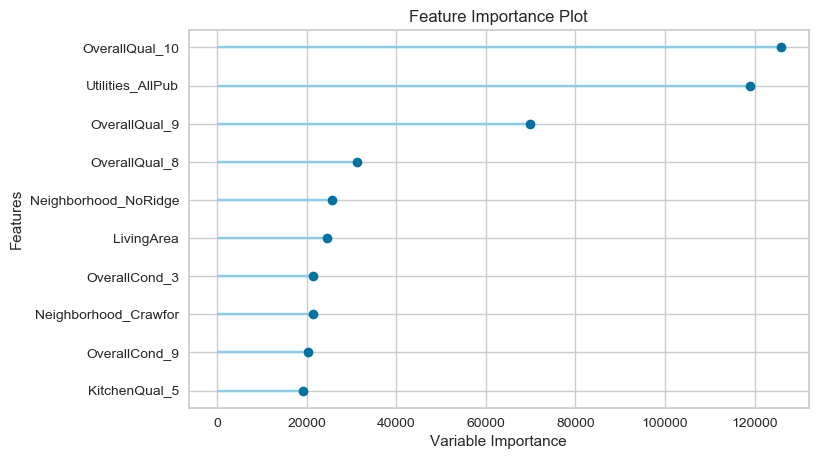

In [15]:
plot_model(tuned_omp, plot = 'feature')

In [16]:
evaluate_model(tuned_omp)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [17]:
predict_model(tuned_omp)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Orthogonal Matching Pursuit,17099.8295,646498764.5382,25426.3400,0.8803,0.1308,0.0990


,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,MiscVal_400,MiscVal_450,MiscVal_480,MiscVal_500,MiscVal_600,MiscVal_620,MiscVal_700,MiscVal_800,SalePrice,Label
0,-1.060171,-1.482810,-0.590656,-0.553483,-1.046111,-0.298876,0.167023,-1.036943,-1.460056,0.680563,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,164700.0,159129.206205
1,-0.828960,-0.431209,-0.150582,-0.553483,-1.046111,-0.298876,0.532366,-0.661114,-1.034893,-0.756096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76000.0,61439.681230
2,-0.373615,-0.767721,-0.401524,-0.553483,-1.046111,-0.298876,0.709292,-0.479109,-0.786213,0.623096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,145000.0,142019.086253
3,-1.619325,-1.566938,-0.571660,-0.553483,-1.046111,-0.298876,0.422073,-0.774572,-1.163244,0.889740,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,113000.0,80125.858900
4,-1.616965,-0.178825,-0.267157,-0.553483,0.680545,-0.298876,-0.827904,-0.256921,-0.577642,-0.756096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127000.0,144757.650969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,0.890969,0.115623,-0.326649,-0.553483,0.556081,-0.298876,-1.020915,-0.585475,-0.949326,-0.756096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,129900.0,115826.818075
387,0.872094,-1.945515,-0.797766,1.162541,-1.046111,-0.298876,0.178512,-1.025124,-1.446687,0.788600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106000.0,103007.284570
388,-1.237118,-0.136761,-0.465278,-0.553483,0.012965,-0.298876,-0.359162,-0.472018,-0.820975,-0.756096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98000.0,88969.904007
389,0.320019,-0.431209,-0.372982,-0.553483,-1.046111,-0.298876,0.785118,-0.401106,-0.740755,-0.756096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109500.0,89874.316521


In [18]:
final_omp = finalize_model(tuned_omp)
final_omp

OrthogonalMatchingPursuit(fit_intercept=False, n_nonzero_coefs=68,
                          normalize=True, precompute='auto', tol=None)

In [19]:
test_predictions = predict_model(final_omp, data = data_test)

In [20]:
from pycaret.utils import check_metric
check_metric(test_predictions.SalePrice, test_predictions.Label, 'R2')

0.9301

In [21]:
save_model(final_omp, 'model//Final Orthogonal Matching Pursuit Model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['MSSubClass'],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='SalePrice',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 nu...
                 ('dummy', Dummify(target='SalePrice')),
                 ('fix_perfect', Remove_100(target='SalePrice')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'pas

In [22]:
X = df.drop(columns = ['SalePrice'])
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.1, random_state = 42)


In [23]:
X_train.shape, X_test.shape

((1303, 77), (145, 77))

In [24]:
trainId = X_train.Id
testId = X_test.Id
X_train = X_train.drop(columns = 'Id')
X_test = X_test.drop(columns = 'Id')
X_train['MSSubClass'] = X_train['MSSubClass'].astype('str')
X_test['MSSubClass'] = X_test['MSSubClass'].astype('str')

In [25]:
num_features = X_train.select_dtypes(include = np.number).columns

In [26]:
cat_features = X_train.select_dtypes(include = 'object').columns

In [27]:
scale = StandardScaler()
X_train_scaled = pd.DataFrame(scale.fit_transform(X_train[num_features]))
X_test_scaled = pd.DataFrame(scale.transform(X_test[num_features]))
X_train_scaled.index = X_train.index
X_test_scaled.index = X_test.index
X_train_scaled.columns = num_features
X_test_scaled.columns = num_features

In [28]:
X_train_ohe = pd.get_dummies(X_train[cat_features])
X_test_ohe = pd.get_dummies(X_test[cat_features])
X_train_ohe.shape

(1303, 181)

In [29]:
X_train_transformed = pd.concat([X_train_scaled, X_train_ohe], axis = 1, )
X_test_transformed = pd.concat([X_test_scaled, X_test_ohe], axis = 1)
X_train_transformed.shape

(1303, 231)

In [30]:
omp = OrthogonalMatchingPursuit()
OrthogonalMatchingPursuit().get_params().keys()

dict_keys(['fit_intercept', 'n_nonzero_coefs', 'normalize', 'precompute', 'tol'])

In [31]:
params = {'n_nonzero_coefs': [60, 65, 70, 75, 80], 'normalize':[True, False]}
params

{'n_nonzero_coefs': [60, 65, 70, 75, 80], 'normalize': [True, False]}

In [32]:
omp_grid_cv = GridSearchCV(omp, param_grid = params, cv =5, n_jobs = -1)

In [33]:
omp_grid_cv.fit(X_train_transformed, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=OrthogonalMatchingPursuit(fit_intercept=True,
                                                 n_nonzero_coefs=None,
                                                 normalize=True,
                                                 precompute='auto', tol=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_nonzero_coefs': [60, 65, 70, 75, 80],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [34]:
omp_grid_cv.cv_results_

{'mean_fit_time': array([0.03650188, 0.05026541, 0.07041183, 0.08058457, 0.10013142,
        0.06951599, 0.06562843, 0.06761765, 0.06722069, 0.10970559]),
 'std_fit_time': array([0.00852432, 0.03310613, 0.02044612, 0.01257371, 0.02183594,
        0.0158473 , 0.01769048, 0.01555956, 0.01566369, 0.01503838]),
 'mean_score_time': array([0.0163559 , 0.00837803, 0.02652869, 0.03151751, 0.02253819,
        0.01795239, 0.01615787, 0.01167579, 0.04208765, 0.0245388 ]),
 'std_score_time': array([0.01079   , 0.00079668, 0.01790418, 0.02232634, 0.0124189 ,
        0.01185213, 0.00811201, 0.00475628, 0.0355443 , 0.01522323]),
 'param_n_nonzero_coefs': masked_array(data=[60, 60, 65, 65, 70, 70, 75, 75, 80, 80],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_normalize': masked_array(data=[True, False, True, False, True, False, True, False,
                    True, False],
    

In [35]:
omp_grid_cv.best_params_, omp_grid_cv.best_score_

({'n_nonzero_coefs': 75, 'normalize': False}, 0.8897940820284382)

In [36]:
best_model = omp_grid_cv.best_estimator_
omp_grid_cv.best_score_

0.8897940820284382

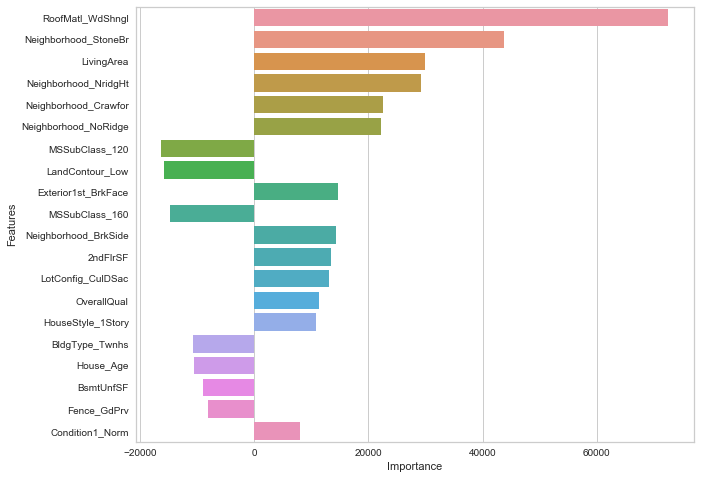

In [37]:
importance = best_model.coef_
imp = pd.DataFrame({'Features': X_train_transformed.columns, 'Importance': importance})
imp['Abs_Importance'] = np.abs(imp.Importance)
value_imp = imp[(imp['Abs_Importance'] != 0.0)]
value_imp.sort_values(by = ['Abs_Importance'], ascending = False, inplace = True)
plt.subplots(figsize = (10,8))
sns.barplot(data = value_imp[:20] ,x = 'Importance', y = 'Features')

In [38]:
num_processor = Pipeline(steps = [('num_imputer', SimpleImputer(strategy = 'median')),('scaler', StandardScaler())])
cat_processor = Pipeline(steps = [('cat_imputer', SimpleImputer(strategy = 'constant', fill_value = 'None')), ('cat_encoder', OneHotEncoder(handle_unknown = 'ignore' ))])

In [39]:
preprocessor = ColumnTransformer(transformers = [('num', num_processor, num_features), ('cat', cat_processor, cat_features)])

In [40]:
omp_pipe = Pipeline([('data_preprocessing', preprocessor), ('Regressor', omp_grid_cv.best_estimator_)])

In [41]:
omp_pipe.fit(X_train, y_train)
y_pred = omp_pipe.predict(X_train)

In [42]:
r2_score(y_train, y_pred), (mean_squared_error(y_train, y_pred)**0.5)

(0.9145496680691678, 23145.523629674062)

In [43]:
modelname_path = "model//finalized_model.pkl"
with open(modelname_path, 'wb') as f:
    pickle.dump(omp_pipe, f)